# Question 1

## a) Data Cleaning / Exploritory Data analytis 

In [332]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [333]:
#Import the dataset into a pandas dataframe

df = pd.read_csv('/Users/martinmcelhinney/Documents/NCIRL/Machine Learning/TABA/train.csv')

In [334]:
#Drop the 'policy_id column' to prevent overfitting

df = df.drop(['policy_id'], axis=1)

In [335]:
#Investigate how many columns and rows are contained in the dataset

df.shape

(58592, 45)

In [336]:
#Examine the columns and first five rows of the dataset

df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Unnamed: 44,Unnamed: 45
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60.0,...,No,Yes,No,No,No,Yes,0,0,NaN,NaN
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60.0,...,No,Yes,No,No,No,Yes,0,0,NaN,NaN
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60.0,...,No,Yes,No,No,No,Yes,0,0,NaN,NaN
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,NaN,NaN
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91.0,...,Yes,Yes,No,Yes,Yes,Yes,2,0,NaN,NaN


In [337]:
#Drop the unused columns containing the NaNs

df.drop(['Unnamed: 44','Unnamed: 45'],axis=1, inplace=True)

In [338]:
df.shape

(58592, 43)

# Determine if there are any missing values (NaNs)in the dataset.


In [339]:
#Determine if there are any missing values (NaNs)in the dataset.

if df.isna().sum().sum() >0:
    
    print('There are Nan values in the dataset')
   
else:
        
    print('There are no NaNs in the dataset')

There are no NaNs in the dataset


# Visualise the absense of NaNs on a heatmap.

<AxesSubplot:>

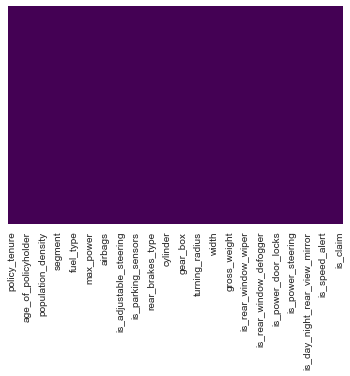

In [340]:
#Visualise the absense of NaNs on a heatmap.

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [341]:
df.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

# Create a boxplot to visualise the outliers in the dataset

<AxesSubplot:>

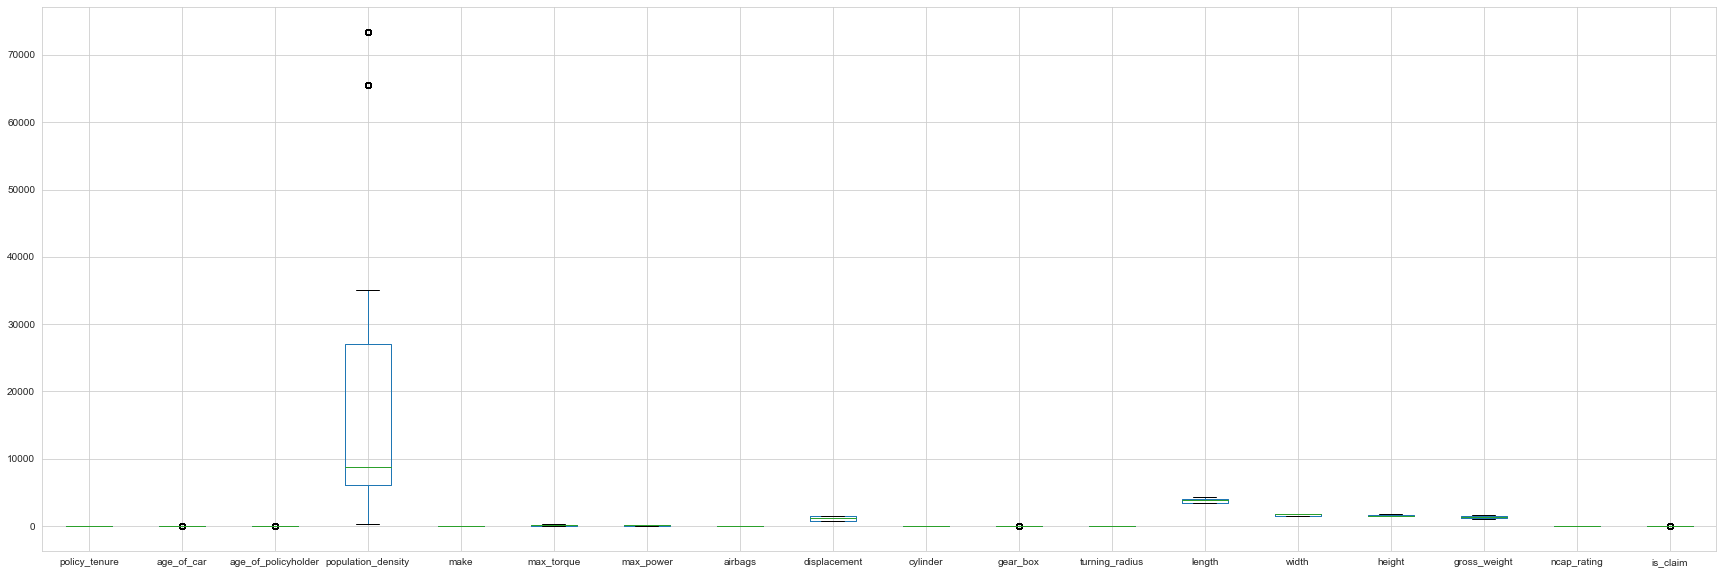

In [342]:
#Create a boxplot to visualise the outliers in the dataset

%matplotlib inline
df['is_claim'] = pd.to_numeric(df['is_claim'])
df.boxplot(figsize=(30,10))

# Remove instances containing attributes +/- 1.5 * IQR

# Define a function to identify and replace the outliers in the dataset using the IQR method


In [343]:
#remove instances containing attributes +/- 1.5 * IQR
#Define a function to identify and replace the outliers in the dataset using the IQR method

#Print the shape of the DataFrame before removing the outliers
print('The Shape of the DataFrame before removing outliers:', df.shape)

#Calculate the IQR for each column (excluding is_claim)
q1 = df.drop('is_claim',axis=1).quantile(0.25)
q3 = df.drop('is_claim',axis=1).quantile(0.75)
iqr = q3-q1

#Identify the outliers
outliers = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()
print('The Number of outliers in each feature:\n', outliers)

#Remove the outliers 
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

#Print the shape of the DataFrame after removing the outliers
print('The Shape of the DataFrame after removinng outliers:', df.shape)

The Shape of the DataFrame before removing outliers: (58592, 43)


/var/folders/vm/h0283fpj6bjgpjpkwfgxh28c0000gn/T/ipykernel_1340/2020466121.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()


The Number of outliers in each feature:
 age_of_car                            269
age_of_policyholder                   221
airbags                                 0
area_cluster                            0
cylinder                                0
displacement                            0
engine_type                             0
fuel_type                               0
gear_box                            14381
gross_weight                            0
height                                  0
is_adjustable_steering                  0
is_brake_assist                         0
is_central_locking                      0
is_claim                                0
is_day_night_rear_view_mirror           0
is_driver_seat_height_adjustable        0
is_ecw                                  0
is_esc                                  0
is_front_fog_lights                     0
is_parking_camera                       0
is_parking_sensors                      0
is_power_door_locks                

/var/folders/vm/h0283fpj6bjgpjpkwfgxh28c0000gn/T/ipykernel_1340/2020466121.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]


The Shape of the DataFrame after removinng outliers: (40914, 43)


In [344]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91.0,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


<Figure size 3600x3600 with 0 Axes>

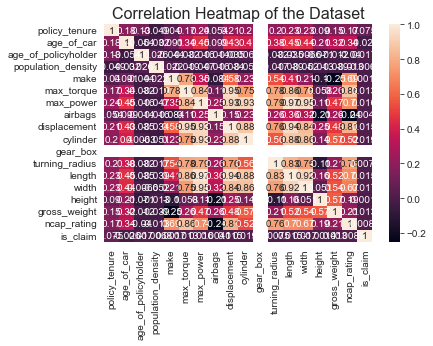

<Figure size 3600x3600 with 0 Axes>

In [345]:
#Create a heatmap of the correlations between the data in the dataframe
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap of the Dataset", fontsize=16)
plt.figure(figsize=(50,50))

<AxesSubplot:xlabel='is_claim', ylabel='count'>

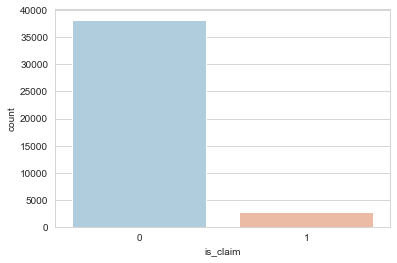

In [346]:
#What are the amount of policyholders in the dataset that have made claims
sns.set_style('whitegrid')
sns.countplot(x='is_claim',data=df,palette='RdBu_r')
              

<AxesSubplot:xlabel='is_claim', ylabel='count'>

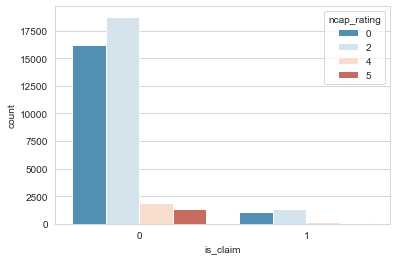

In [347]:
#Policy Claims broken down by NCAP Safety Rating of Vehicles
sns.set_style('whitegrid')
sns.countplot(x='is_claim',hue='ncap_rating',data=df,palette='RdBu_r')


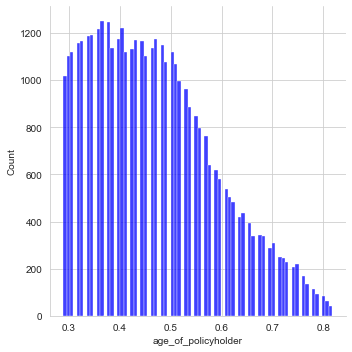

In [348]:
#The distribution of the ages of policyholders
sns.displot(df['age_of_policyholder'],kde=False,color='blue', bins=80)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40914 entries, 0 to 58590
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     40914 non-null  float64
 1   age_of_car                        40914 non-null  float64
 2   age_of_policyholder               40914 non-null  float64
 3   area_cluster                      40914 non-null  object 
 4   population_density                40914 non-null  int64  
 5   make                              40914 non-null  int64  
 6   segment                           40914 non-null  object 
 7   model                             40914 non-null  object 
 8   fuel_type                         40914 non-null  object 
 9   max_torque                        40914 non-null  float64
 10  max_power                         40914 non-null  float64
 11  engine_type                       40914 non-null  object 
 12  airb

# Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature


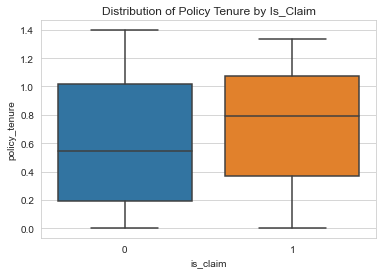

In [350]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="policy_tenure", data=df)
plt.title("Distribution of Policy Tenure by Is_Claim")
plt.show()

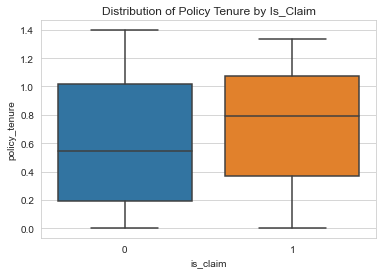

In [351]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="policy_tenure", data=df)
plt.title("Distribution of Policy Tenure by Is_Claim")
plt.show()

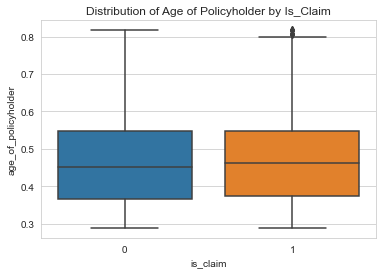

In [352]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="age_of_policyholder", data=df)
plt.title("Distribution of Age of Policyholder by Is_Claim")
plt.show()

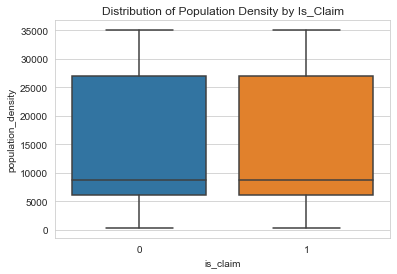

In [353]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="population_density", data=df)
plt.title("Distribution of Population Density by Is_Claim")
plt.show()

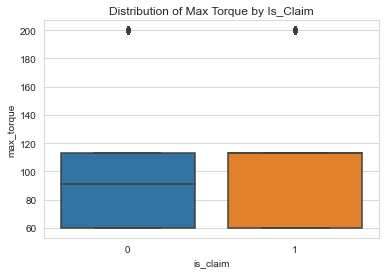

In [354]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="max_torque", data=df)
plt.title("Distribution of Max Torque by Is_Claim")
plt.show()

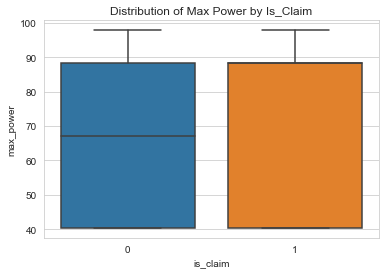

In [355]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="max_power", data=df)
plt.title("Distribution of Max Power by Is_Claim")
plt.show()

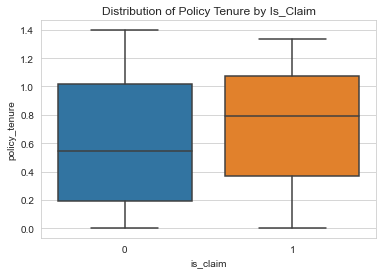

In [356]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="policy_tenure", data=df)
plt.title("Distribution of Policy Tenure by Is_Claim")
plt.show()

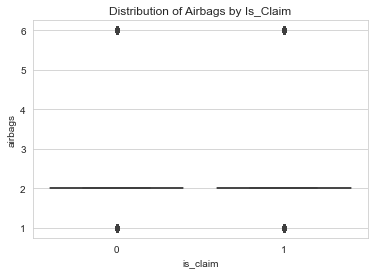

In [357]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="airbags", data=df)
plt.title("Distribution of Airbags by Is_Claim")
plt.show()

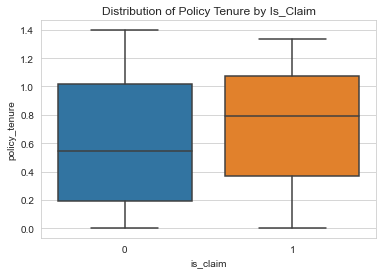

In [358]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="policy_tenure", data=df)
plt.title("Distribution of Policy Tenure by Is_Claim")
plt.show()

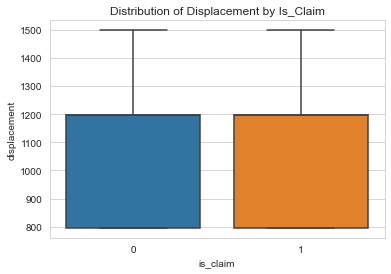

In [359]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="displacement", data=df)
plt.title("Distribution of Displacement by Is_Claim")
plt.show()

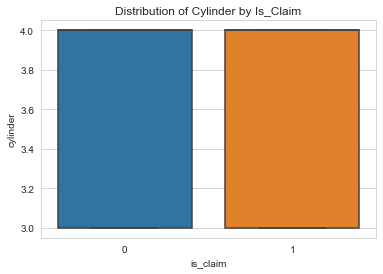

In [360]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="cylinder", data=df)
plt.title("Distribution of Cylinder by Is_Claim")
plt.show()

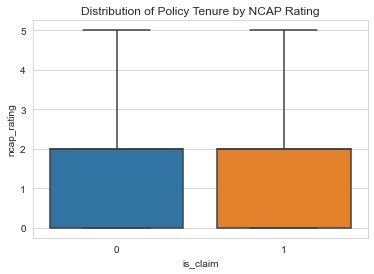

In [361]:
#Utilising boxplots to visualise the distribution of each feature in the dataset by the "is_claim" feature

sns.boxplot(x="is_claim", y="ncap_rating", data=df)
plt.title("Distribution of Policy Tenure by NCAP Rating")
plt.show()

## b) Feature Extraction / Feature Engineering

In [362]:
print(df.dtypes)

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                          float64
max_power                           float64
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

# Encode the dataset to address categorical variables for use in the regression models:

In [363]:
#Encode the dataset to address categorical variables for use in the regression models:
df_encoded = pd.get_dummies(df)

In [364]:
df_encoded.shape

(40914, 102)

In [365]:
df_encoded.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,max_torque,max_power,airbags,displacement,cylinder,...,is_central_locking_Yes,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990,1,60.0,40.36,2,796,3,...,0,0,1,1,0,1,0,1,0,1
1,0.672619,0.02,0.375000,27003,1,60.0,40.36,2,796,3,...,0,0,1,1,0,1,0,1,0,1
2,0.841110,0.02,0.384615,4076,1,60.0,40.36,2,796,3,...,0,0,1,1,0,1,0,1,0,1
3,0.900277,0.11,0.432692,21622,1,113.0,88.50,2,1197,4,...,1,0,1,0,1,0,1,0,1,1
4,0.596403,0.11,0.634615,34738,2,91.0,67.06,2,999,3,...,1,0,1,1,0,0,1,0,1,1


In [366]:
print(df_encoded.dtypes)

policy_tenure                        float64
age_of_car                           float64
age_of_policyholder                  float64
population_density                     int64
make                                   int64
                                      ...   
is_day_night_rear_view_mirror_No       uint8
is_day_night_rear_view_mirror_Yes      uint8
is_ecw_No                              uint8
is_ecw_Yes                             uint8
is_speed_alert_Yes                     uint8
Length: 102, dtype: object


# Feature Engineering - Performing normalisation to scale the data

In [367]:
#Feature Engineering - Performing normalisation to scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [368]:
df_scaled.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,max_torque,max_power,airbags,displacement,cylinder,...,is_central_locking_Yes,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_Yes
0,0.368128,0.208333,0.672727,0.135267,0.00,0.000000,0.000000,0.2,0.000000,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.480579,0.083333,0.163636,0.768808,0.00,0.000000,0.000000,0.2,0.000000,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.601456,0.083333,0.181818,0.108962,0.00,0.000000,0.000000,0.2,0.000000,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.643903,0.458333,0.272727,0.613941,0.00,0.378571,0.836781,0.2,0.571225,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.425901,0.458333,0.654545,0.991423,0.25,0.221429,0.464106,0.2,0.289174,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## c) Feature Selection / Dimensionality Reduction

# Apply RFE to the dataset to facilitate feature selection

In [369]:
#Apply RFE to the dataset to facilitate feature selection

#Import the libraries
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

#Define the inputs 
df_predictors = df_scaled.drop(['is_claim'], axis =1)
x = df_predictors
y = df_scaled.is_claim

In [370]:
#Carry out the transformation

rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 10)
rfe.fit(x,y)


#Transform the input data to include only the selected features

df_transformed = rfe.transform(x)

#Add the 'is_claim' column back into the transformed dataset

df_transformed = pd.DataFrame(df_transformed, columns=df_predictors.columns[rfe.get_support()])
df_transformed['is_claim'] = y

for i in range(df_transformed.shape[1]):
    print('Column: %s' % (df_transformed.columns[i]))




Column: policy_tenure
Column: age_of_car
Column: age_of_policyholder
Column: population_density
Column: length
Column: width
Column: height
Column: gross_weight
Column: area_cluster_C2
Column: engine_type_K Series Dual jet
Column: is_claim


In [371]:
df_transformed.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,length,width,height,gross_weight,area_cluster_C2,engine_type_K Series Dual jet,is_claim
0,0.368128,0.208333,0.672727,0.135267,0.00,0.142857,0.000000,0.291939,0.0,0.0,0.0
1,0.480579,0.083333,0.163636,0.768808,0.00,0.142857,0.000000,0.291939,1.0,0.0,0.0
2,0.601456,0.083333,0.181818,0.108962,0.00,0.142857,0.000000,0.291939,0.0,0.0,0.0
3,0.643903,0.458333,0.272727,0.613941,1.00,0.928571,0.114286,0.618736,0.0,0.0,0.0
4,0.425901,0.458333,0.654545,0.991423,0.52,0.371429,0.042857,0.226580,0.0,0.0,0.0


# Apply a PCA to the dataset to reduce the dimensionaity of the data


In [372]:
#Apply a PCA to the dataset to reduce the dimensionaity of the data

#Import Libraries
from sklearn.decomposition import PCA

#Apply PCA to the df_transformed dataset
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_transformed.drop(['is_claim'], axis=1))

#Print the 10 principal components
print('The 10 principal components:')
print(df_pca[0:9])


The 10 principal components:
[[-7.18318741e-01 -3.44247598e-01 -1.69517471e-01  1.53419452e-01
  -7.88326744e-02 -1.13544496e-01  2.81922892e-01  1.47218795e-01
  -4.93959863e-02 -3.43107044e-03]
 [-7.53235897e-01  8.14482479e-01 -2.06121308e-01  1.71421269e-01
  -3.77472878e-01 -1.39303210e-01 -1.71430072e-01 -6.99374170e-02
  -7.64562368e-02 -6.74659235e-05]
 [-7.08950456e-01 -3.65309713e-01 -1.05800959e-01  2.30802895e-01
  -1.77522989e-01 -1.01804036e-01 -2.08117247e-01 -7.80696282e-02
  -6.82232568e-02  3.28385530e-03]
 [ 3.46753992e-01  7.75133805e-02  6.42519156e-01  4.34357408e-02
   2.78803260e-01 -1.24187723e-01 -9.61373229e-02  4.80179586e-02
  -6.41536200e-02  7.43195384e-03]
 [-3.31534851e-01  2.79748657e-01  1.15055820e-01  9.74654567e-02
   5.69136797e-01 -9.94972689e-02  1.42202301e-01  3.14869075e-01
   1.19758505e-01  8.89574398e-02]
 [ 4.32061851e-01 -2.00468226e-01  7.00775311e-01 -5.21861272e-01
  -9.82265385e-02  2.70126007e-02  9.24552948e-02  2.23541473e-01
  -3

In [373]:
#Convert df_pca back into a Pandas Dataframe

df_pca = pd.DataFrame(df_pca)

## d)Choice of Modelling Techniques / e)Hyperparameter Optimisation

# Apply a logistical regression model to predict whether a claim will be made based on predictor variables:


In [374]:
#Apply a logistical regression model to predict whether 
#a claim will be made based on predictor variables:

#import libraries
from sklearn import linear_model

#initialise logistic regression model
lr = linear_model.LogisticRegression()

Text(0.5, 1.0, 'Correlation Heatmap of the Dataset')

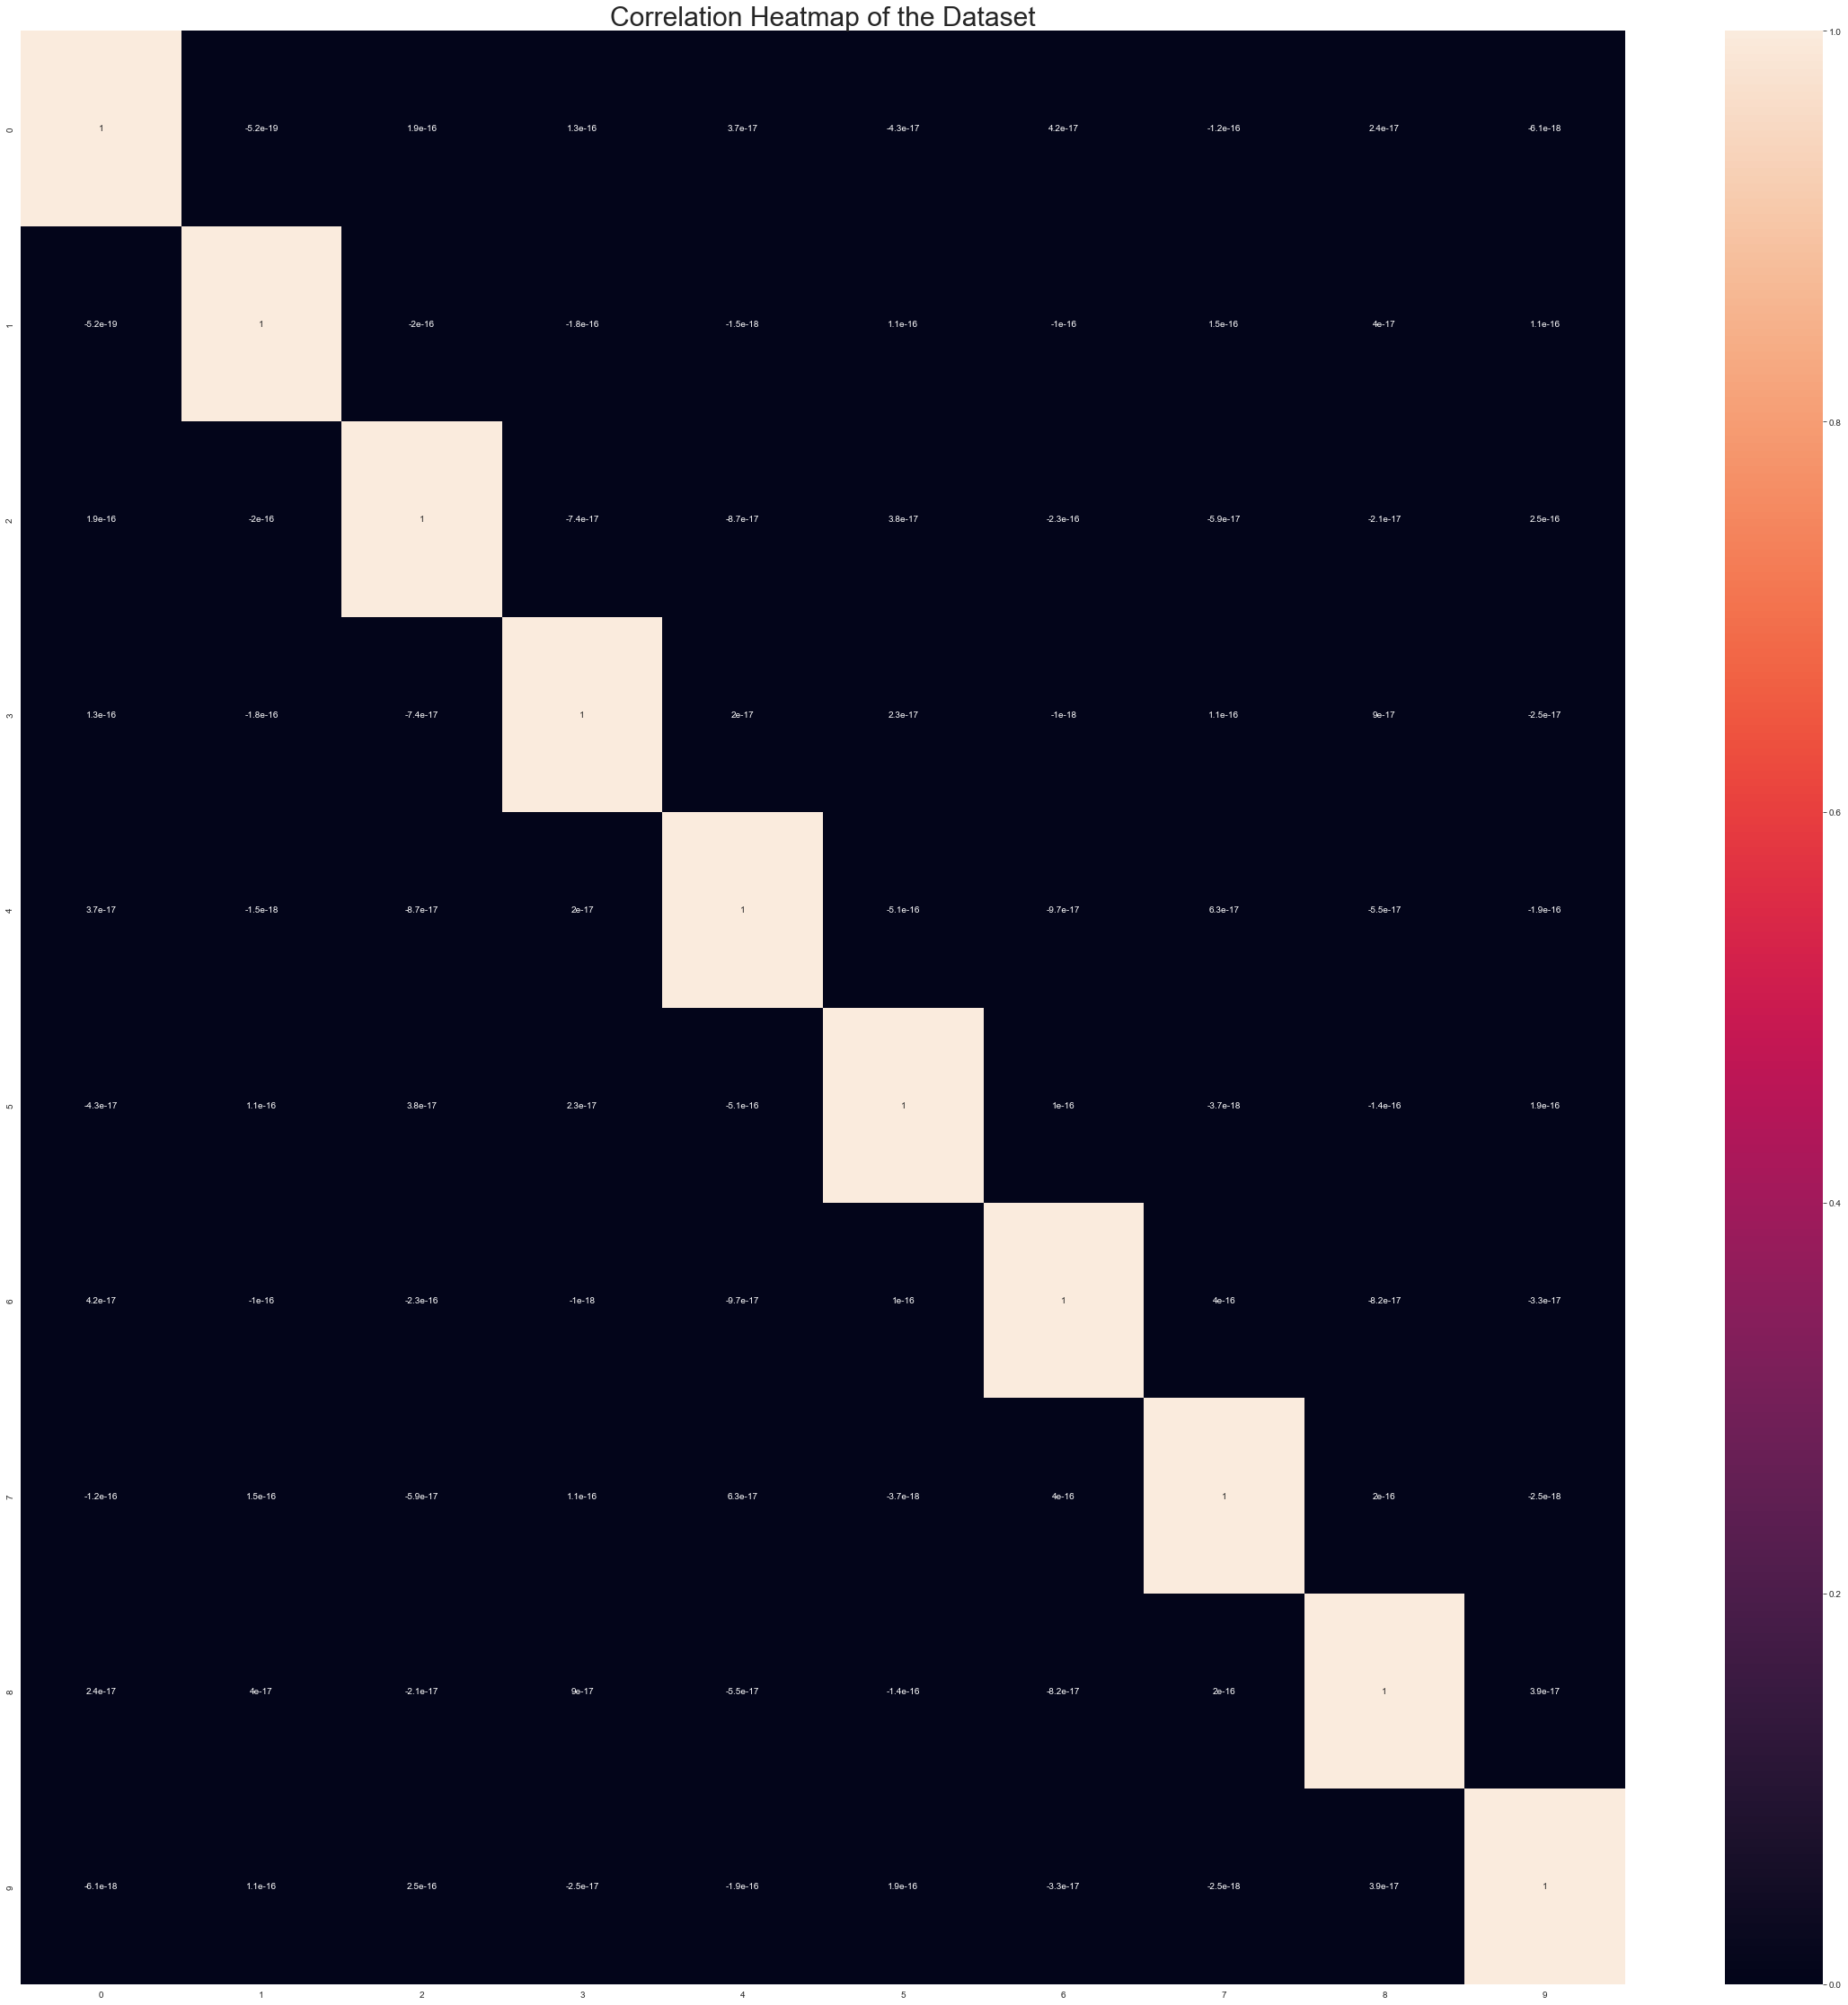

In [375]:
#Create a heatmap of the dimensionally reduced dataset to investigate possible multicoliniarity before
#applying a logistical regression to the data

plt.figure(figsize=(40,40))
corr = pd.DataFrame(df_pca).corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap of the Dataset", fontsize=30)

In [376]:
train = df_transformed

In [377]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,length,width,height,gross_weight,area_cluster_C2,engine_type_K Series Dual jet,is_claim
0,0.368128,0.208333,0.672727,0.135267,0.00,0.142857,0.000000,0.291939,0.0,0.0,0.0
1,0.480579,0.083333,0.163636,0.768808,0.00,0.142857,0.000000,0.291939,1.0,0.0,0.0
2,0.601456,0.083333,0.181818,0.108962,0.00,0.142857,0.000000,0.291939,0.0,0.0,0.0
3,0.643903,0.458333,0.272727,0.613941,1.00,0.928571,0.114286,0.618736,0.0,0.0,0.0
4,0.425901,0.458333,0.654545,0.991423,0.52,0.371429,0.042857,0.226580,0.0,0.0,0.0


In [378]:
#Import the train/test/split function from sklearn

from sklearn.model_selection import train_test_split

In [379]:
#Split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(train.drop(['is_claim'], axis=1),
                                                   train['is_claim'], test_size=0.30,
                                                   random_state=101)

In [380]:
#Import the logistic regression function
from sklearn.linear_model import LogisticRegression

In [381]:
#Fit the logistic regression model and tell the model what is train

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [382]:
#Obtain predictions

predictions = logmodel.predict(x_test)

In [383]:
#Import the classification report function from sklearn

from sklearn.metrics import classification_report

In [384]:
#Print the classification report to evaluate the logistic regression model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     11461
         1.0       0.00      0.00      0.00       814

    accuracy                           0.93     12275
   macro avg       0.47      0.50      0.48     12275
weighted avg       0.87      0.93      0.90     12275



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Optimisation of the Logistic Regression Model

In [385]:
# Define the Hyperparameters to tune:

param_grid = {'C': [0.1,1,10],'penalty': ['l2']}

In [386]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [387]:
#Create an instance of the GridSearchCV function

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
estimator=model,
param_grid=param_grid,
cv=5
)

In [388]:
#Fit the GridSearchCV object to the training data using the 'fit' method
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [389]:
#Examine the best hyperparameters and best score as follows
print(grid_search.best_params_)
print('The optimised hyperparameters for the logistic regression :',grid_search.best_score_)

{'C': 0.1, 'penalty': 'l2'}
The optimised hyperparameters for the logistic regression : 0.9354376944259915


In [390]:
#Use the best model obtained from GridSearchCV to make predictions on the dataset
#to make predictions on the test data an eveluate its performance

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Best Model: ', best_model)
print('Predictions: ', y_pred)

Best Model:  LogisticRegression(C=0.1)
Predictions:  [0. 0. 0. ... 0. 0. 0.]


# Construct a K Nearest Neighbours (KNN) model to predict if a policy holder will make a claim

In [391]:
#Construct a K Nearest Neighbours (KNN) model to predict if a policy holder will
#make a claim

#Import the necessary libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [392]:
# Split the dataset into training and testing sets:

x = df_transformed[df_transformed.drop('is_claim', axis=1).columns]
y = df_transformed['is_claim']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [393]:
#Train the KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [394]:
#Test the model and calculate accuracy
y_pred = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)
print('Accuracy of KNN model: ', accuracy)

Accuracy of KNN model:  0.9380855397148676


# Hyperparameter Optimisation of the KNN Model

In [395]:
# Hyperparameter Optimisation of the KNN Model
from sklearn.model_selection import GridSearchCV


In [396]:
#Define a parameter grid
param_grid = {'n_neighbors': [3,5,7,9],
             'weights':['uniform','distance']}

In [397]:
#Create the KNN model
knn = KNeighborsClassifier()

In [398]:
#Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [399]:
print('Best Hyperparameters: ', grid.best_params_)
print('Best Accuracy Score: ', grid.best_score_)

Best Hyperparameters:  {'n_neighbors': 9, 'weights': 'uniform'}
Best Accuracy Score:  0.9345945127788013


# Construct a Random Forest model to predict if a policy holder will make a claim

In [400]:
#Construct a Random Forest model to predict if a policy holder will make a claim

#Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



In [401]:
# Split the dataset into training and testing sets:

x = df_transformed[df_transformed.drop('is_claim', axis=1).columns]
y = df_transformed['is_claim']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [402]:
#Create Random Forest Classifier Model

rfc = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

In [403]:
#Fit model on training data

rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [404]:
#Makes predictions on the testing data

y_pred = rfc.predict(x_test)

In [405]:
#Evaluate the model's accuracy

accuracy = rfc.score(x_test, y_test)
print("Accuracy of the Random Forest Model: ", accuracy)

Accuracy of the Random Forest Model:  0.9376756690700232


# Hyperparameter Optimisation of the Random Forest Model

In [406]:
# Hyperparameter Optimisation of the Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define a parameter grid:
param_dist = {
    'n_estimators': [7],
    'max_depth': [None] + list(range(2, 20)),
    'min_samples_split': [15],
    'min_samples_leaf': [6],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [407]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [408]:
# Define the random search strategy
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=76, cv=5, scoring='accuracy', random_state=42)

In [409]:
# Fit the random search to the training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=76,
                   param_distributions={'max_depth': [None, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [6],
                                        'min_samples_split': [15],
                                        'n_estimators': [7]},
                   random_state=42, scoring='accuracy')

In [410]:
#Print the best hyperparameters
print('The best hyperparameters for the Random Forest Model are: ', random_search.best_params_)

The best hyperparameters for the Random Forest Model are:  {'n_estimators': 7, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 2}


In [411]:
#Retrain the model on the entire training set using the best hyperparameters

rf_best = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=15,
                       n_estimators=7, random_state=42)

In [412]:
#Evaluate the model on the validation set:
y_pred = rf_best.predict(x_val)
print('The accuracy of the model with optimised hyperparameters is: ', accuracy_score(y_val, y_pred))

The accuracy of the model with optimised hyperparameters is:  0.9376756690700232


# Question 2

# b) Data cleaning - Explain all the steps taken to clean the data

In [413]:
# Import the relevant libraries
import email

In [414]:
# Import the dataset into a pandas dataframe

df1 = pd.read_csv('/Users/martinmcelhinney/Documents/NCIRL/Machine Learning/TABA/emails.csv')

In [415]:
#View the first 5 rows of the dataset
df1.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [416]:
# Examine the shape of the data
df1.shape

(517401, 2)

In [417]:
# Examine a sample of the emails
print(df1.loc[1]['message'])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

In [418]:
# Transform the first email into a useable format

from email import message_from_string

message = df1.loc[1]['message']
emails = message_from_string(message)
emails.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [419]:
# Show the email body (payload)

emails.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [420]:
# Apply this format to the rest of the dataframe

def get_field(field, messages):
    column = []
    for message in messages:
        emails = message_from_string(message)
        column.append(emails.get(field))
        
        return column



In [421]:
# Define a get_field function

def get_field(field, messages):
    fields = []
    for message in messages:
        e = message_from_string(message)
        field_value = e.get(field)
        fields.append(field_value)
    return fields

In [422]:
df1['date'] = get_field('Date', df1['message'])
df1['subject'] = get_field('Subject', df1['message'])
df1['X-Folder'] = get_field('X-Folder', df1['message'])
df1['X-From'] = get_field('X-From', df1['message'])
df1['X-To'] = get_field('X-To', df1['message'])
df1.head()

,file,message,date,subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper


In [423]:
# Identify the missing values in the dataset

df1.isnull().sum()

file         0
message      0
date         0
subject      0
X-Folder    29
X-From      29
X-To        29
dtype: int64

In [424]:
# Drop the rows that contain missing values

df1.dropna(axis=0, inplace=True)

df1.isnull().sum()

file        0
message     0
date        0
subject     0
X-Folder    0
X-From      0
X-To        0
dtype: int64

In [425]:
# Extract the message text of the emails

def body(messages):
    column = []
    for message in messages:
        e = message_from_string(message)
        column.append(e.get_payload())
    return column

df1['message_text'] = body(df1['message'])
df1.head()

,file,message,date,subject,X-Folder,X-From,X-To,message_text
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,Let's shoot for Tuesday at 11:45.


In [426]:
# Extract employee names, examine the string structure

df1['file'][:5]

0       allen-p/_sent_mail/1.
1      allen-p/_sent_mail/10.
2     allen-p/_sent_mail/100.
3    allen-p/_sent_mail/1000.
4    allen-p/_sent_mail/1001.
Name: file, dtype: object

In [427]:
# Extract employee names

def employee(file):
    column = []
    for string in file:
        column.append(string.split("/") [0])
    return column

df1['employee'] = employee(df1['file'])
df1.head()

,file,message,date,subject,X-Folder,X-From,X-To,message_text,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,Let's shoot for Tuesday at 11:45.,allen-p


In [428]:
# Insert date

import datetime
from dateutil import parser

# Show example:

x = parser.parse('Mon, 14 May 2001 16:39:00 -0700 (PDT)')
print(x.strftime('%d-%m-%Y'))

14-05-2001


In [429]:
# Apply insert date to then entire dataset

def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime('%d-%m-%Y'))
        
    return column

df1['date'] = change_type(df1['date'])
df1.head()

,file,message,date,subject,X-Folder,X-From,X-To,message_text,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,18-10-2000,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,23-10-2000,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,31-08-2000,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,Let's shoot for Tuesday at 11:45.,allen-p


In [430]:
# Visualisations

# Top 20 email senders in the dataset

top_20_senders = df1['employee'].value_counts()[:20]
top_20_senders = top_20_senders.reset_index()
top_20_senders.columns = ['Employee_Name', 'Amount_of_emails_sent']

print(top_20_senders)

   Employee_Name  Amount_of_emails_sent
0     kaminski-v                  28463
1     dasovich-j                  28234
2         kean-s                  25351
3         mann-k                  23381
4        jones-t                  19950
5   shackleton-s                  18687
6       taylor-m                  13875
7       farmer-d                  13032
8      germany-c                  12436
9         beck-s                  11830
10       symes-k                  10827
11       nemec-g                  10655
12       scott-s                   8022
13      rogers-b                   8009
14        bass-e                   7823
15     sanders-r                   7329
16    campbell-l                   6489
17     shapiro-r                   6071
18      guzman-m                   6054
19         lay-k                   5937


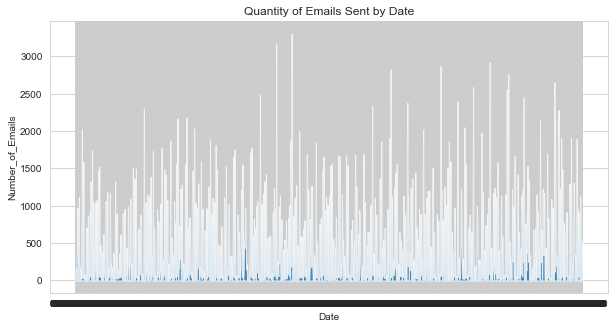

In [431]:
#Visualisation of the quantity of emails sent by date

email_count = df1.groupby('date')['message'].count()

fig, ax = plt.subplots(figsize=(10,5))
ax.fill_between(email_count.index, email_count.values, alpha=0.8, cmap='rainbow')
ax.set_xlabel('Date')
ax.set_ylabel('Number_of_Emails')
ax.set_title('Quantity of Emails Sent by Date')
plt.show()

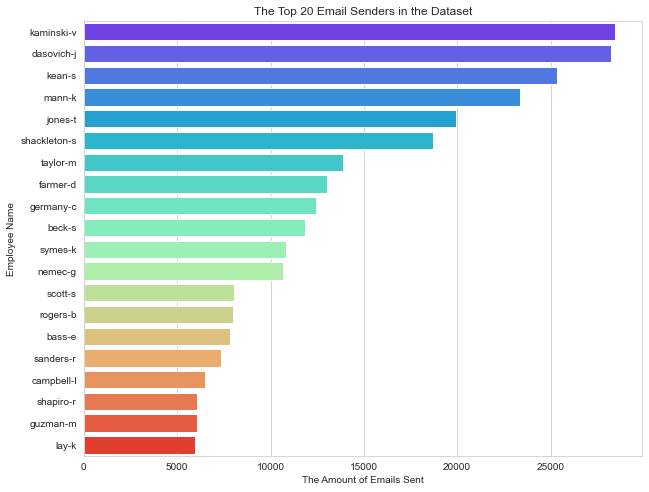

In [432]:
# Visualisation of the top 20 email senders

plt.figure(figsize=(10,8))

sns.barplot(y='Employee_Name', x='Amount_of_emails_sent', data=top_20_senders, palette='rainbow')
plt.title('The Top 20 Email Senders in the Dataset')
plt.xlabel('The Amount of Emails Sent')
plt.ylabel('Employee Name')
plt.show()

# c) Visualising clusters - Briefly discuss the technique/algorithm used to visualise data on the scatter plot                                  

In [433]:
# Import Libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [434]:
# Pre-process the data using TF-IDF Vectorization

vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(df1['message_text'])

In [435]:
# Reduce the dimensionality of the data using Truncated SVD

svd = TruncatedSVD(n_components=50)
X = svd.fit_transform(X)

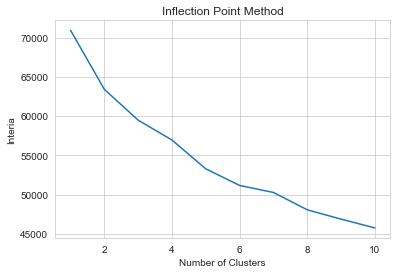

In [436]:
# Determine the optimal value of k using the inflection point method

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11), inertia)    
plt.title('Inflection Point Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Interia')
plt.show()

In [437]:
# Train the K-Means model with the optimal value of k. From the plot above we can 
# estimate 10 clusters

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [438]:
# Predict the clusters for each email
labels = kmeans.predict(X)

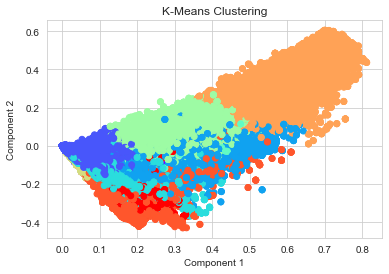

In [439]:
# Visualise the clusters using a scatter plot

plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Question 3

# a) Brief highlight on the problem domain/dataset

# b) Text Analysis - Describe each step of the text analysis technique

In [301]:
# Import the csv into the pandas DataFrame

data = pd.read_csv('/Users/martinmcelhinney/Documents/NCIRL/Machine Learning/TABA/IMDB Dataset.csv')
data.head()
print(data.shape)

(50000, 2)


In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [303]:
# investigate the columns and first five rows of the dataset

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [304]:
#The reviews are equally distributed between positive and negative

data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [305]:
# Are there missing values in the dataset?

print(data.isnull().sum())

review       0
sentiment    0
dtype: int64


In [306]:
!pip install nltk

# Data Pre-Processing

In [307]:
# Tokenization of text

import nltk
from nltk.tokenize.toktok import ToktokTokenizer

nltk.download('stopwords')
tokenizer = ToktokTokenizer()

# Establishing English language stopwords

stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinmcelhinney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [308]:
# Remove html from the dataset

import re
from bs4 import BeautifulSoup

def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove any square brackets

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '',text)

# Remove the noisy text

def remove_noise(text):
    text = strip_html(text)
    text = remove_square_brackets(text)
    return text

# Apply to the review column

data['review']=data['review'].apply(remove_noise)


In [309]:
# Remove special characters

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Apply to the review column

data['review']=data['review'].apply(remove_special_characters)

In [310]:
# Stem the text in the dataset

from nltk.stem.porter import PorterStemmer

def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text=''.join([ps.stem(word) for word in text.split()])
    return text

# Apply to the review column

data['review']=data['review'].apply(simple_stemmer)

In [311]:
# Remove the stopwords

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
            
        filtered_text = ''.join(filtered_tokens)
        return filtered_text

# Apply to the review column
data['review']=data['review'].apply(remove_stopwords)

In [312]:
# Split the dataset into train and test

# Train dataset

train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]

# Test dataset

test_reviews = data.review[40000:]
test_sentiments = data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [314]:
# Normalise Train reviews

norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

'oneoftheotherreviewhamentionthatafterwatchjust1ozepisodyoullbehooktheyarerightasthiisexactliwhathappenwithmethfirstthingthatstruckmeaboutozwaitbrutalandunflinchsceneofviolencwhichsetinrightfromthewordgotrustmethiisnotashowforthefaintheartortimidthishowpullnopunchwithregardtodrugsexorviolencitishardcorintheclassicuseoftheworditiscallozasthatisthenicknamgiventotheoswaldmaximumsecurstatepenitentariitfocusmainlionemeraldcitianexperimentsectionoftheprisonwhereallthecellhaveglassfrontandfaceinwardsoprivaciisnothighontheagendaemcitiishometomanyaryanmuslimgangstalatinochristianitalianirishandmoresoscuffldeathstaredodgidealandshadiagreementareneverfarawayiwouldsaythemainappealoftheshowisduetothefactthatitgoewhereothershowwouldntdareforgetprettipicturpaintformainstreamaudiencforgetcharmforgetromanceozdoesntmessaroundthefirstepisodieversawstruckmeassonastiitwasurrealicouldntsayiwareadiforitbutasiwatchmoreidevelopatastforozandgotaccustomtothehighlevelofgraphicviolencnotjustviolencbutinjusticcrook

In [315]:
# Normalise Test reviews

norm_test_reviews=data.review[40000:]
norm_test_reviews[45005]

'ireadallthereviewhereafterwatchthipiecofcinematgarbagandittookmeatleast2pagetofindoutthatsomebodielsdidntthinkthatthiappallingliunfunnimontagwasnttheacmofhumourinthe70orindeinaniothereraifthiisnttheleastfunnisetofsketchcomediiveeverseenitlldotillitcomealonghalfoftheskithadalreadibeendoneandinfinitbetterbyactsuchasmontipythonandwoodiallenifiwatosaythatanicepiecofanimthatlastabout90secondisthehighlightofthifilmitwouldstillnotgetclosetosumupjusthowmindlessanddrivelriddenthiwastof75minutissemincomedionliintheworldwhereseminreallidoemeansemenscatologhumouronliinaworldwherescatisactualfeceprecursorjokeonliifbythatwemeanthatthiisahandbookofhownottodocomedititandbumandtheoddbeaverniceifyouareapubescboywithatleastonehandfreeandhaventfoundoutthatplayboyexistgiveitabreakbecausitwatheearli70nowaytherehadbeensketchcomedigobackatleasttenyearpriortheonliwayicouldevenforgivthifilmevenbemadeisifitwaatgunpointretrohardlisketchaboutclownsubtlipervertchildrenmaybecutedginsomecirclanditcouldactualhavebeen

# Model Construction

In [318]:
# Construct the Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer

#Carry out Count Vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transform the Train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)

# Transform the Test reviews
cv_test_reviews=cv.transform(norm_test_reviews)



print('Bag of words CV Train: ', cv_train_reviews.shape)
print('Bag of words CV Test: ', cv_test_reviews.shape)



Bag of words CV Train:  (40000, 43429)
Bag of words CV Test:  (10000, 43429)


In [326]:
# TFIDF Model - Used to convrt text into a matrix of TFIDF features

from sklearn.feature_extraction.text import TfidfVectorizer

#TDIDF Vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1, use_idf=True,ngram_range=(1,3))

# Transform the Train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)

#Transform the Test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print('TFIDF Train: ', tv_train_reviews.shape)
print('TFIDF Test: ', tv_test_reviews.shape)

TFIDF Train:  (40000, 43429)
TFIDF Test:  (10000, 43429)


In [320]:
# Label the sentiment data
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()

# Transform the sentiment data

sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [321]:
# Splitting the sentiment data into Train and Test

train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]

print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [329]:
# Build a logistic regression model for the Bag of Words and TFIDF features

#Train the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1, random_state=42)

#Fit the Bag of Words Model
lr_bow=lr.fit(cv_train_reviews,train_sentiments.ravel())
print(lr_bow)

#Fit the TFIDF Model
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments.ravel())

print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


# Evaluation

In [330]:
#How the models performs on the dataset

#Predicting how the model for Bag of Words performs
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

#Predicting how the TFIDF model performs
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [331]:
#Determine the Accuracy of the models

#Accuracy of the Bag of Words Model
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print('The Linear regression Bag of Words Accuracy Score: ', lr_bow_score)

#Accuracy of the TFIDF Model
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print('The linear regression TFIDF Accuracy Score: ', lr_tfidf_score)

The Linear regression Bag of Words Accuracy Score:  0.5032
The linear regression TFIDF Accuracy Score:  0.5032
